In [176]:
import sqlite3

In [177]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [178]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.model_selection import train_test_split

## Load the data

In [181]:
# Load the dataset
diabetes_df = pd.read_csv("C:/Users/deeps/OneDrive/Documents/WEBSTER/DATASET/Excel/diabetes_data.csv")

# Display the first few rows of the dataset
diabetes_df.head(10)

,PatientID,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,...,TinglingHandsFeet,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis,DoctorInCharge
0,6000,44,0,1,2,1,32.985284,1,4.499365,2.443385,...,1,73.765109,0,0,0,1.782724,4.486980,7.211349,1,Confidential
1,6001,51,1,0,1,2,39.916764,0,1.578919,8.301264,...,0,91.445753,0,0,1,3.381070,5.961705,5.024612,1,Confidential
2,6002,89,1,0,1,3,19.782251,0,1.177301,6.103395,...,0,54.485744,0,0,0,2.701019,8.950821,7.034944,0,Confidential
3,6003,21,1,1,1,2,32.376881,1,1.714621,8.645465,...,0,77.866758,0,0,1,1.409056,3.124769,4.717774,0,Confidential
4,6004,27,1,0,1,3,16.808600,0,15.462549,4.629383,...,0,37.731808,0,0,0,1.218452,6.977741,7.887940,0,Confidential
5,6005,65,0,0,0,0,15.820815,1,17.781024,9.252522,...,0,86.378969,0,0,0,1.535161,9.682226,2.744281,0,Confidential
6,6006,61,1,2,1,3,20.075147,0,1.086479,8.745650,...,0,86.036931,0,0,0,0.578208,1.175504,1.229453,0,Confidential
7,6007,74,1,3,0,3,29.438938,0,6.187378,9.114535,...,0,47.315820,0,0,0,1.659424,2.258377,9.035877,0,Confidential
8,6008,54,0,0,1,2,15.027557,0,19.505734,0.590771,...,0,88.638130,0,0,0,3.675916,2.006186,3.452805,1,Confidential
9,6009,82,1,0,1,1,34.300044,1,15.943844,6.056621,...,0,96.636541,0,0,0,2.567315,4.031643,2.633287,0,Confidential


In [182]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1879 entries, 0 to 1878
Data columns (total 46 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   PatientID                      1879 non-null   int64  
 1   Age                            1879 non-null   int64  
 2   Gender                         1879 non-null   int64  
 3   Ethnicity                      1879 non-null   int64  
 4   SocioeconomicStatus            1879 non-null   int64  
 5   EducationLevel                 1879 non-null   int64  
 6   BMI                            1879 non-null   float64
 7   Smoking                        1879 non-null   int64  
 8   AlcoholConsumption             1879 non-null   float64
 9   PhysicalActivity               1879 non-null   float64
 10  DietQuality                    1879 non-null   float64
 11  SleepQuality                   1879 non-null   float64
 12  FamilyHistoryDiabetes          1879 non-null   i

In [183]:
diabetes_df.T

,0,1,2,3,4,5,6,7,8,9,...,1869,1870,1871,1872,1873,1874,1875,1876,1877,1878
PatientID,6000,6001,6002,6003,6004,6005,6006,6007,6008,6009,...,7869,7870,7871,7872,7873,7874,7875,7876,7877,7878
Age,44,51,89,21,27,65,61,74,54,82,...,53,29,24,59,75,37,80,38,43,85
Gender,0,1,1,1,1,0,1,1,0,1,...,0,1,1,0,1,0,1,1,0,1
Ethnicity,1,0,0,1,0,0,2,3,0,0,...,3,0,0,0,0,0,0,0,1,0
SocioeconomicStatus,2,1,1,1,1,0,1,0,1,1,...,0,1,1,2,1,2,2,0,2,2
EducationLevel,1,2,3,2,3,0,3,3,2,1,...,1,3,3,2,3,2,2,2,0,2
BMI,32.985284,39.916764,19.782251,32.376881,16.8086,15.820815,20.075147,29.438938,15.027557,34.300044,...,27.051115,38.813517,15.342747,33.668673,30.378877,20.811137,27.694312,35.640824,32.423016,33.145119
Smoking,1,0,0,1,0,1,0,0,0,1,...,1,0,1,0,1,0,0,0,0,0
AlcoholConsumption,4.499365,1.578919,1.177301,1.714621,15.462549,17.781024,1.086479,6.187378,19.505734,15.943844,...,15.936018,2.806481,17.267981,9.996765,9.235769,10.946207,16.067905,4.865124,6.362936,13.854861
PhysicalActivity,2.443385,8.301264,6.103395,8.645465,4.629383,9.252522,8.74565,9.114535,0.590771,6.056621,...,0.958362,0.864336,8.530101,0.267199,9.868789,3.217636,7.107335,9.881212,4.750079,5.434137


In [184]:
diabetes_df.dtypes

PatientID                          int64
Age                                int64
Gender                             int64
Ethnicity                          int64
SocioeconomicStatus                int64
EducationLevel                     int64
BMI                              float64
Smoking                            int64
AlcoholConsumption               float64
PhysicalActivity                 float64
DietQuality                      float64
SleepQuality                     float64
FamilyHistoryDiabetes              int64
GestationalDiabetes                int64
PolycysticOvarySyndrome            int64
PreviousPreDiabetes                int64
Hypertension                       int64
SystolicBP                         int64
DiastolicBP                        int64
FastingBloodSugar                float64
HbA1c                            float64
SerumCreatinine                  float64
BUNLevels                        float64
CholesterolTotal                 float64
CholesterolLDL  

In [185]:
diabetes_df.describe()

,PatientID,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,...,SlowHealingSores,TinglingHandsFeet,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis
count,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,...,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000
mean,6939.000000,55.043108,0.487493,0.755721,0.992017,1.699308,27.687601,0.281533,10.096587,5.200790,...,0.102714,0.111229,48.508643,0.052155,0.103246,0.200639,1.997101,4.957539,5.011736,0.400213
std,542.564896,20.515839,0.499977,1.047558,0.764940,0.885665,7.190975,0.449866,5.914216,2.857012,...,0.303666,0.314500,28.758488,0.222400,0.304361,0.400585,1.122632,2.910934,2.920908,0.490072
min,6000.000000,20.000000,0.000000,0.000000,0.000000,0.000000,15.025898,0.000000,0.000928,0.004089,...,0.000000,0.000000,0.002390,0.000000,0.000000,0.000000,0.004013,0.005384,0.000362,0.000000
25%,6469.500000,38.000000,0.000000,0.000000,0.000000,1.000000,21.469981,0.000000,4.789725,2.751022,...,0.000000,0.000000,23.974098,0.000000,0.000000,0.000000,1.057801,2.420024,2.410113,0.000000
50%,6939.000000,55.000000,0.000000,0.000000,1.000000,2.000000,27.722988,0.000000,10.173865,5.249002,...,0.000000,0.000000,47.519693,0.000000,0.000000,0.000000,1.987170,4.843886,5.035208,0.000000
75%,7408.500000,73.000000,1.000000,1.000000,2.000000,2.000000,33.856460,1.000000,15.285359,7.671402,...,0.000000,0.000000,72.883179,0.000000,0.000000,0.000000,2.946019,7.513933,7.586865,1.000000
max,7878.000000,90.000000,1.000000,3.000000,2.000000,3.000000,39.998811,1.000000,19.996231,9.993893,...,1.000000,1.000000,99.788530,1.000000,1.000000,1.000000,3.999715,9.997165,9.993029,1.000000


In [186]:
diabetes_df.isnull().sum()

PatientID                        0
Age                              0
Gender                           0
Ethnicity                        0
SocioeconomicStatus              0
EducationLevel                   0
BMI                              0
Smoking                          0
AlcoholConsumption               0
PhysicalActivity                 0
DietQuality                      0
SleepQuality                     0
FamilyHistoryDiabetes            0
GestationalDiabetes              0
PolycysticOvarySyndrome          0
PreviousPreDiabetes              0
Hypertension                     0
SystolicBP                       0
DiastolicBP                      0
FastingBloodSugar                0
HbA1c                            0
SerumCreatinine                  0
BUNLevels                        0
CholesterolTotal                 0
CholesterolLDL                   0
CholesterolHDL                   0
CholesterolTriglycerides         0
AntihypertensiveMedications      0
Statins             

In [187]:
diabetes_df[diabetes_df['DietQuality'] >1]

,PatientID,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,...,TinglingHandsFeet,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis,DoctorInCharge
0,6000,44,0,1,2,1,32.985284,1,4.499365,2.443385,...,1,73.765109,0,0,0,1.782724,4.486980,7.211349,1,Confidential
1,6001,51,1,0,1,2,39.916764,0,1.578919,8.301264,...,0,91.445753,0,0,1,3.381070,5.961705,5.024612,1,Confidential
2,6002,89,1,0,1,3,19.782251,0,1.177301,6.103395,...,0,54.485744,0,0,0,2.701019,8.950821,7.034944,0,Confidential
3,6003,21,1,1,1,2,32.376881,1,1.714621,8.645465,...,0,77.866758,0,0,1,1.409056,3.124769,4.717774,0,Confidential
4,6004,27,1,0,1,3,16.808600,0,15.462549,4.629383,...,0,37.731808,0,0,0,1.218452,6.977741,7.887940,0,Confidential
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1874,7874,37,0,0,2,2,20.811137,0,10.946207,3.217636,...,1,88.122729,0,0,1,3.154225,3.849584,8.805087,0,Confidential
1875,7875,80,1,0,2,2,27.694312,0,16.067905,7.107335,...,0,77.128599,0,0,1,0.424893,5.217465,0.915878,1,Confidential
1876,7876,38,1,0,0,2,35.640824,0,4.865124,9.881212,...,0,13.148221,0,0,0,0.553757,3.377744,3.017481,1,Confidential
1877,7877,43,0,1,2,0,32.423016,0,6.362936,4.750079,...,0,54.370980,0,0,0,1.132470,0.009250,4.914556,1,Confidential


In [188]:
diabetes_df['BMI'].mean()

27.687601425288864

In [189]:
diabetes_df['Smoking'].mean()

0.28153273017562536

In [190]:
diabetes_df.groupby("DoctorInCharge").mean()

,PatientID,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,...,SlowHealingSores,TinglingHandsFeet,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis
DoctorInCharge,,,,,,,,,,,,,,,,,,,,,
Confidential,6939.0,55.043108,0.487493,0.755721,0.992017,1.699308,27.687601,0.281533,10.096587,5.20079,...,0.102714,0.111229,48.508643,0.052155,0.103246,0.200639,1.997101,4.957539,5.011736,0.400213


In [191]:
diabetes_df.Smoking.value_counts()

Smoking
0    1350
1     529
Name: count, dtype: int64

In [192]:
diabetes_df.Gender.value_counts()

Gender
0    963
1    916
Name: count, dtype: int64

In [193]:
diabetes_df.EducationLevel.value_counts()

EducationLevel
2    725
1    615
3    376
0    163
Name: count, dtype: int64

In [194]:
diabetes_df.groupby('Diagnosis')[['Ethnicity' , 'Smoking' , 'PhysicalActivity']].agg(['mean', 'sum', 'min', 'max'])

Ethnicity                Smoking              PhysicalActivity  \
               mean  sum min max      mean  sum min max             mean   
Diagnosis                                                                  
0          0.775510  874   0   3  0.261757  295   0   1         5.215752   
1          0.726064  546   0   3  0.311170  234   0   1         5.178368   

                                            
                   sum       min       max  
Diagnosis                                   
0          5878.152840  0.004089  9.993893  
1          3894.132367  0.028360  9.969572

## Data Analysis

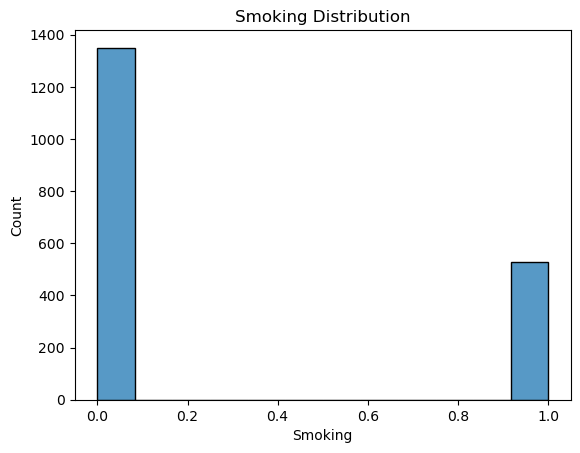

In [195]:
sns.histplot(diabetes_df.Smoking)
plt.title('Smoking Distribution')
plt.show()

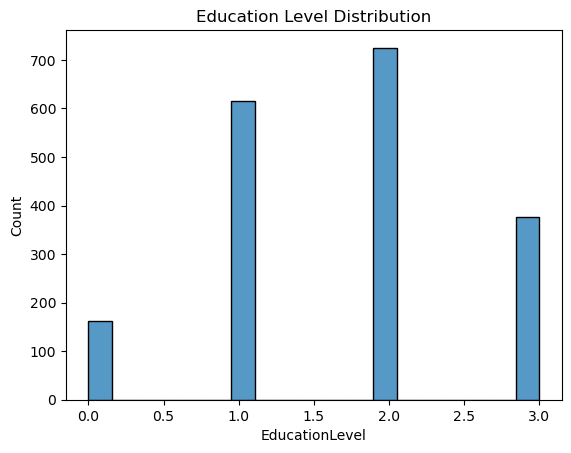

In [196]:
sns.histplot(diabetes_df.EducationLevel)
plt.title('Education Level Distribution')
plt.show()

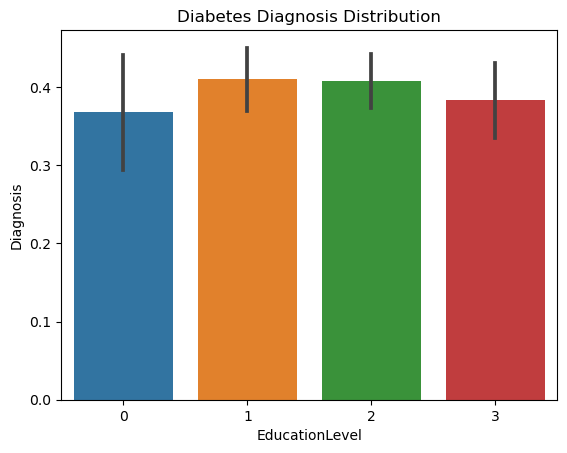

In [197]:
sns.barplot(y= diabetes_df.Diagnosis, x= diabetes_df.EducationLevel)
plt.title('Diabetes Diagnosis Distribution')
plt.show()

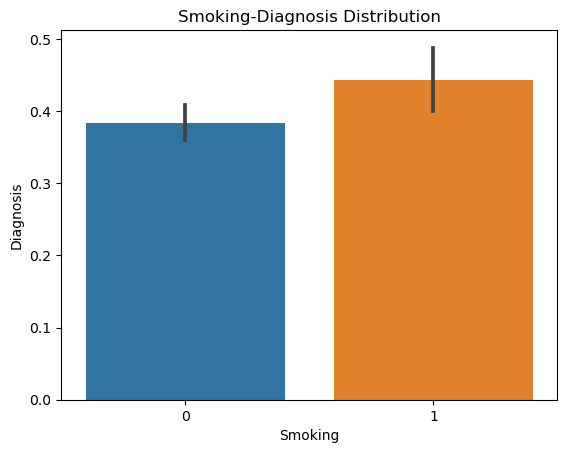

In [198]:
sns.barplot(y= diabetes_df.Diagnosis, x= diabetes_df.Smoking)
plt.title('Smoking-Diagnosis Distribution')
plt.show()

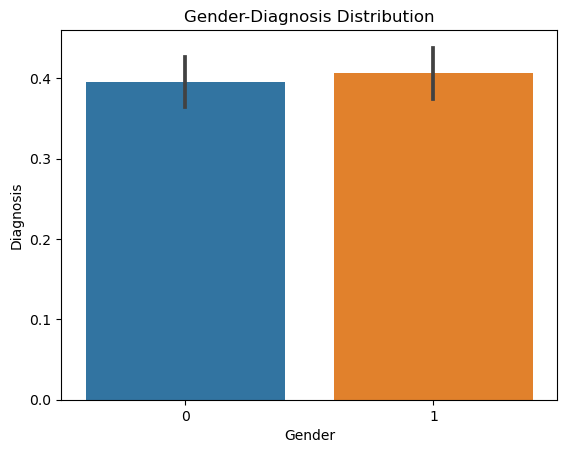

In [199]:
sns.barplot(y= diabetes_df.Diagnosis, x= diabetes_df.Gender)
plt.title('Gender-Diagnosis Distribution')
plt.show()

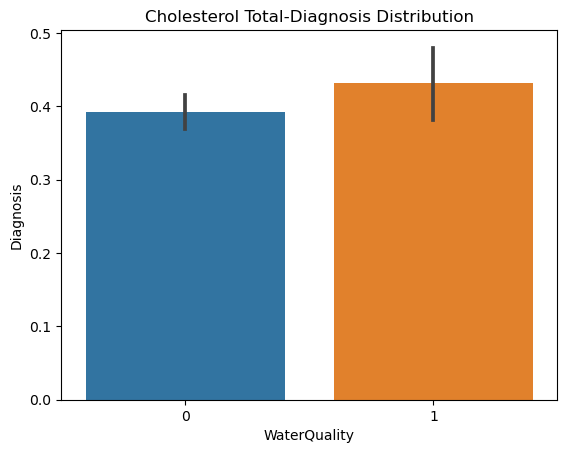

In [200]:
sns.barplot(y= diabetes_df.Diagnosis, x= diabetes_df.WaterQuality)
plt.title('Cholesterol Total-Diagnosis Distribution')
plt.show()

In [201]:
diabetes_df.groupby('EducationLevel')[['Diagnosis' , 'Smoking' , 'PhysicalActivity']].agg(['median', 'mean', 'min', 'max'])

Diagnosis                   Smoking                    \
                  median      mean min max  median      mean min max   
EducationLevel                                                         
0                    0.0  0.368098   0   1     0.0  0.220859   0   1   
1                    0.0  0.409756   0   1     0.0  0.300813   0   1   
2                    0.0  0.408276   0   1     0.0  0.260690   0   1   
3                    0.0  0.382979   0   1     0.0  0.316489   0   1   

               PhysicalActivity                                
                         median      mean       min       max  
EducationLevel                                                 
0                      5.109473  5.288231  0.038327  9.935757  
1                      5.591697  5.327184  0.053623  9.993893  
2                      5.064152  5.125811  0.004089  9.980646  
3                      5.032038  5.100725  0.045043  9.943985

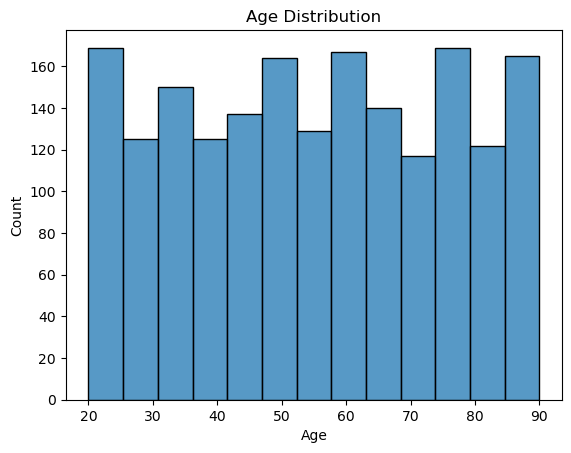

In [202]:
# EDA: Visualize distributions
sns.histplot(diabetes_df['Age'], kde=False)
plt.title('Age Distribution')
plt.show()


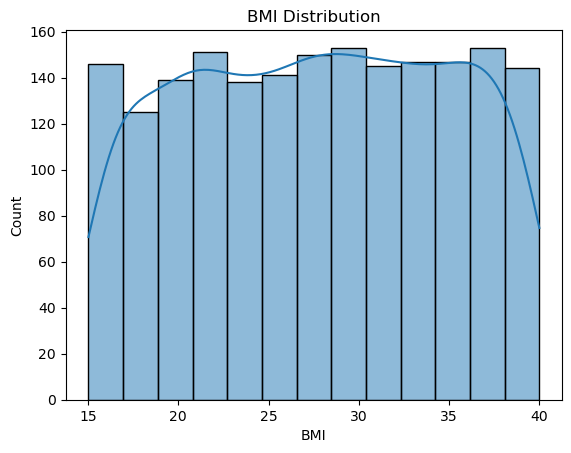

In [203]:
sns.histplot(diabetes_df['BMI'], kde=True)
plt.title('BMI Distribution')
plt.show()


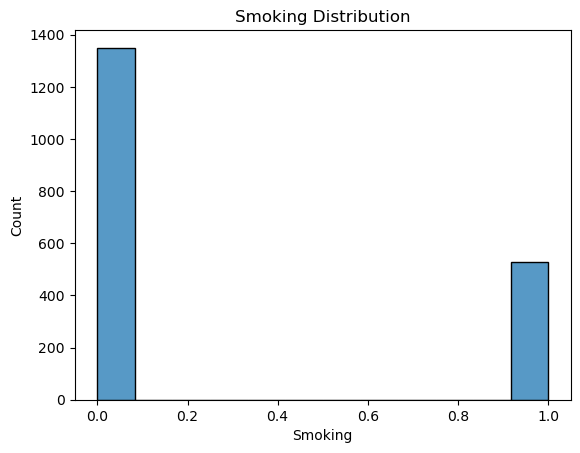

In [204]:
sns.histplot(diabetes_df['Smoking'], kde=False)
plt.title('Smoking Distribution')
plt.show()


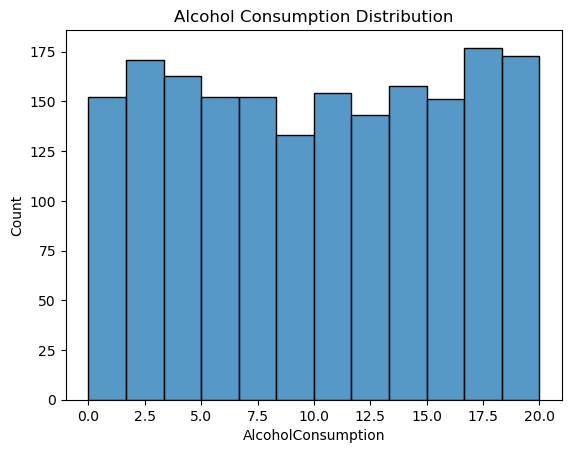

In [205]:
sns.histplot(diabetes_df['AlcoholConsumption'], kde=False)
plt.title('Alcohol Consumption Distribution')
plt.show()


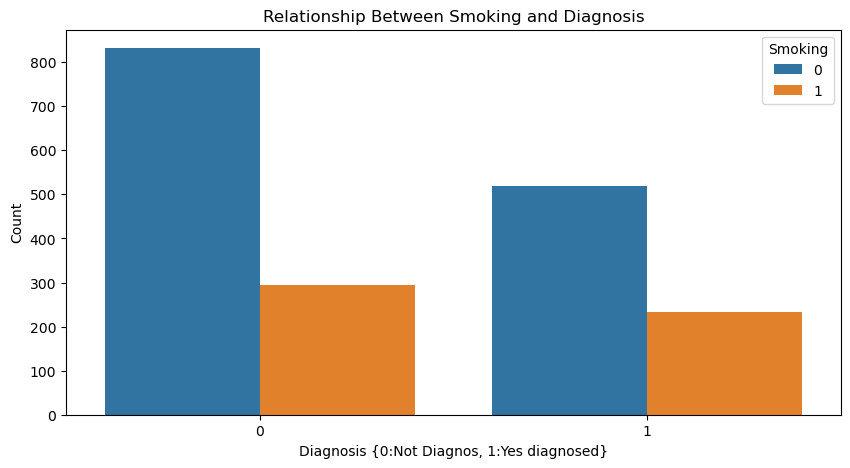

In [206]:
# Relationship Between Smoking and Diagnosis
plt.figure(figsize = (10,5))
sns.countplot(data=diabetes_df, x='Diagnosis', y=None, hue='Smoking')
plt.title('Relationship Between Smoking and Diagnosis')
plt.xlabel('Diagnosis {0:Not Diagnos, 1:Yes diagnosed}')
plt.ylabel('Count')
plt.show()

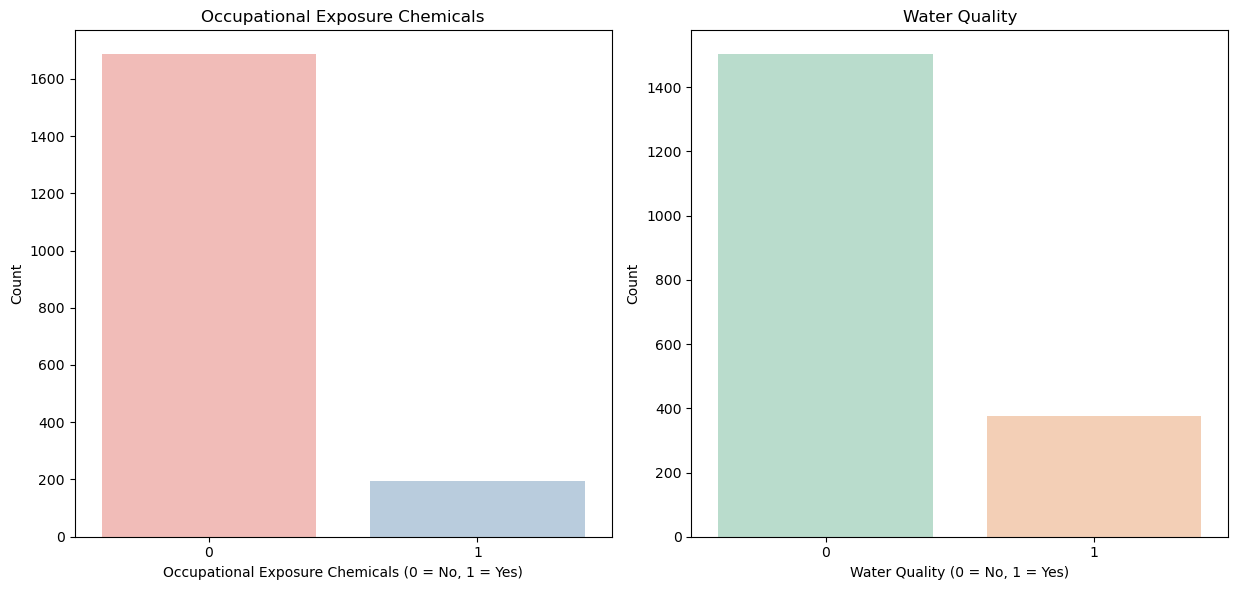

In [207]:
plt.figure(figsize=(18, 6))

# Occupational Exposure Chemicals
plt.subplot(1, 3, 2)
sns.countplot(data=diabetes_df, x='OccupationalExposureChemicals', palette='Pastel1')
plt.title('Occupational Exposure Chemicals')
plt.xlabel('Occupational Exposure Chemicals (0 = No, 1 = Yes)')
plt.ylabel('Count')

# Water Quality
plt.subplot(1, 3, 3)
sns.countplot(data=diabetes_df, x='WaterQuality', palette='Pastel2')
plt.title('Water Quality')
plt.xlabel('Water Quality (0 = No, 1 = Yes)')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

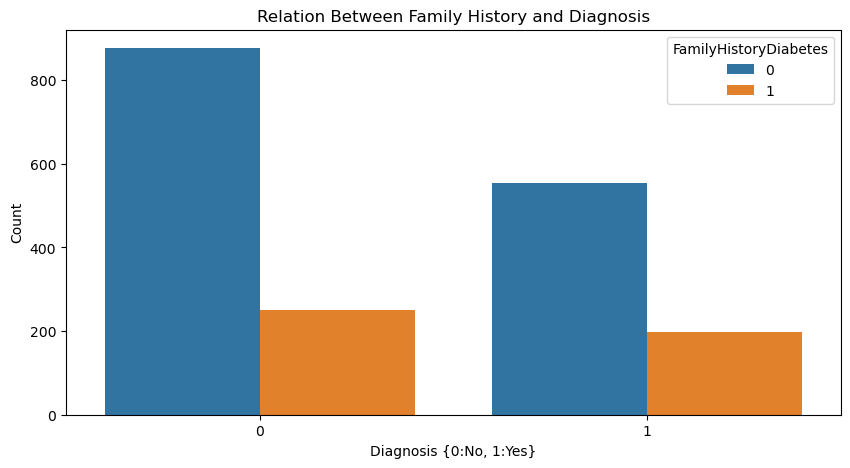

In [208]:
# Relation Between Family Diabetes related History and Diagnosis
plt.figure(figsize = (10,5))
sns.countplot(data=diabetes_df, x='Diagnosis', y=None, hue='FamilyHistoryDiabetes')
plt.title('Relation Between Family History and Diagnosis')
plt.xlabel('Diagnosis {0:No, 1:Yes}')
plt.ylabel('Count')
plt.show()

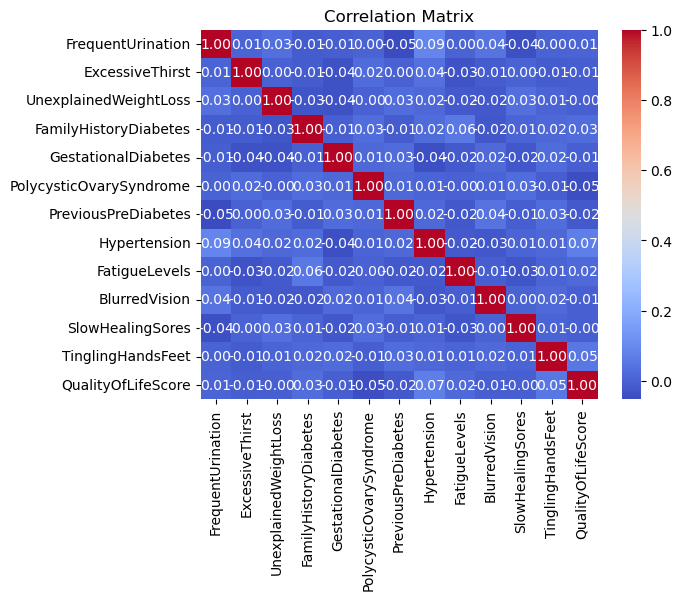

In [209]:
# Correlation Matrix
columns_of_interest = ['FrequentUrination', 'ExcessiveThirst', 'UnexplainedWeightLoss', 'FamilyHistoryDiabetes', 'GestationalDiabetes',
       'PolycysticOvarySyndrome', 'PreviousPreDiabetes', 'Hypertension', 'FatigueLevels', 'BlurredVision', 'SlowHealingSores','TinglingHandsFeet','QualityOfLifeScore']
cor_diabetes = diabetes_df[columns_of_interest]

sns.heatmap(cor_diabetes.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Data Preparation & Data Partitioning

In [210]:
X = diabetes_df.drop(['Diagnosis','DoctorInCharge'], axis=1)
y = diabetes_df['Diagnosis']

#DATA PARTITIONING
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=242)


### Model Fitting

In [211]:
## Model Fitting - Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=242)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [212]:
# Evaluate the model
print(confusion_matrix(y_test, y_pred))

[[224   6]
 [ 24 122]]


In [213]:

print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.97      0.94       230
           1       0.95      0.84      0.89       146

    accuracy                           0.92       376
   macro avg       0.93      0.90      0.91       376
weighted avg       0.92      0.92      0.92       376

ROC-AUC Score: 0.9047647409172126


In [214]:
#Standardized data to same scale
standardizer = StandardScaler()
x_standardized =standardizer.fit_transform(X_train)
x_test_std = standardizer.fit_transform(X_test)

In [215]:
# Train the Logistic Regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)


LogisticRegression()

In [216]:
# Make predictions on the test set
logit_y_pred = logistic_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, logit_y_pred)
conf_matrix = confusion_matrix(y_test, logit_y_pred)
class_report = classification_report(y_test, logit_y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)


Accuracy: 0.723404255319149
Confusion Matrix:
[[192  38]
 [ 66  80]]
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.83      0.79       230
           1       0.68      0.55      0.61       146

    accuracy                           0.72       376
   macro avg       0.71      0.69      0.70       376
weighted avg       0.72      0.72      0.72       376



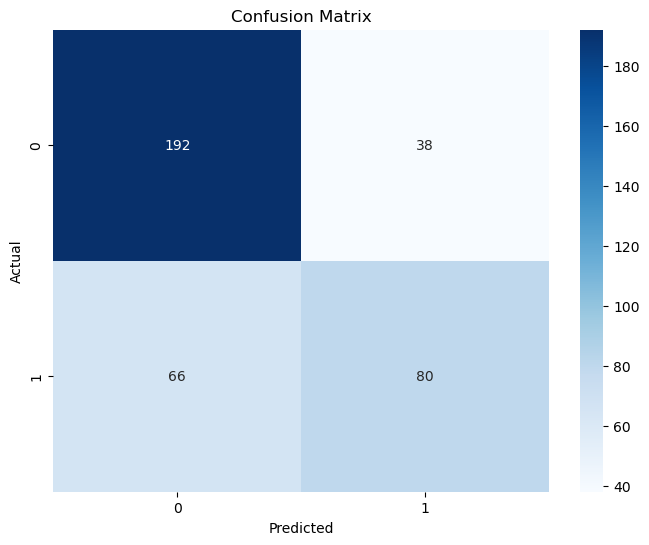

In [217]:
# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()